# Test sencillos con wireshark 

## Test 1 

### Topologia

![single_topo](single2_topo.png)

**Comando de construcción**:

```
sudo mn --mac --link tc,bw=10,delay=10ms
```

**Procedimiento de test**:
1. Se carga la topologia con el comando de construcción. Para el caso se ejecutaron algunos comandos para conocer las mac de los elementos:

```
containernet> py h1.MAC()
00:00:00:00:00:01
containernet> py h2.MAC()
00:00:00:00:00:02
containernet> py s1.intfs
{0: <Intf lo>, 1: <TCIntf s1-eth1>, 2: <TCIntf s1-eth2>}
containernet> py s1.intfs[1].MAC()
d2:78:8b:8b:12:ca
containernet> py s1.intfs[2].MAC()
86:36:2d:3c:c7:36
```


2. Se abre wireshark y se eligen los puntos de captura y se empieza a capturar.

**Puntos de captura**: 
  * s1-eth1

**Filtros**:
  * Para el trafico iperf: ```tcp``` 
  * Para el trafico ping: ```icmp```

3. Se ejecuta el comando iperf en containernet.

```
# Aplicación del comando iperf #
containernet> iperf
*** Iperf: testing TCP bandwidth between h1 and h2 
*** Results: ['9.50 Mbits/sec', '12.0 Mbits/sec']

# Aplicación del comando ping #

containernet> h1 ping -c 10 h2
PING 10.0.0.2 (10.0.0.2) 56(84) bytes of data.
64 bytes from 10.0.0.2: icmp_seq=1 ttl=64 time=41.5 ms
64 bytes from 10.0.0.2: icmp_seq=2 ttl=64 time=40.4 ms
64 bytes from 10.0.0.2: icmp_seq=3 ttl=64 time=40.2 ms
64 bytes from 10.0.0.2: icmp_seq=4 ttl=64 time=40.2 ms
64 bytes from 10.0.0.2: icmp_seq=5 ttl=64 time=40.2 ms
64 bytes from 10.0.0.2: icmp_seq=6 ttl=64 time=40.2 ms
64 bytes from 10.0.0.2: icmp_seq=7 ttl=64 time=40.2 ms
64 bytes from 10.0.0.2: icmp_seq=8 ttl=64 time=40.1 ms
64 bytes from 10.0.0.2: icmp_seq=9 ttl=64 time=40.2 ms
64 bytes from 10.0.0.2: icmp_seq=10 ttl=64 time=40.2 ms

--- 10.0.0.2 ping statistics ---
10 packets transmitted, 10 received, 0% packet loss, time 9010ms
rtt min/avg/max/mdev = 40.193/40.397/41.581/0.402 ms

```

4. Despues de que se obtienen los resultados se detiene la captura.

Primeros datos de la tabla

   Interval start  bits/seg
0               0       0.0
1               1       0.0
2               2       0.0
3               3       0.0
4               4       0.0

Ultimos datos de la tabla

    Interval start    bits/seg
64              64  10004500.0
65              65   9993980.0
66              66  10005600.0
67              67  10004500.0
68              68   2475580.0




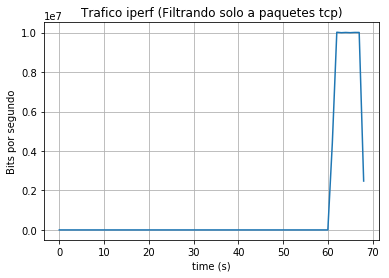

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("iperf_trafic_test1.csv")
print("Primeros datos de la tabla\n")
print(df.head())
print("\nUltimos datos de la tabla\n")
print(df.tail())
print("\n")
fig, ax = plt.subplots()
t = df['Interval start']
bps = df['bits/seg']
ax.plot(t, bps)
ax.set(xlabel='time (s)', ylabel='Bits por segundo',
       title='Trafico iperf (Filtrando solo a paquetes tcp)')
ax.grid()

plt.show()

A continuación se muestra la grafica obtenida de wireshark:

![perf_trafico_single2](iperf_trafico_single2)

Primeros datos de la tabla

   Interval start  bits/seg
0               0         0
1               1         0
2               2         0
3               3         0
4               4         0

Ultimos datos de la tabla

     Interval start  bits/seg
112             112      1568
113             113      1568
114             114      1568
115             115      1568
116             116      1568




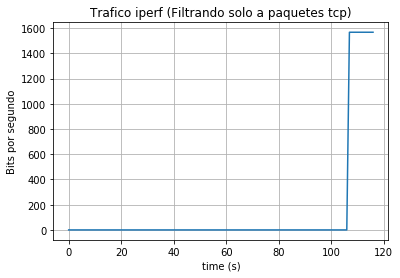

In [17]:
# Captura para los datos ping
df2 = pd.read_csv("ping_traffic_test1.csv")

print("Primeros datos de la tabla\n")
print(df2.head())
print("\nUltimos datos de la tabla\n")
print(df2.tail())
print("\n")

fig, ax = plt.subplots()
t = df2['Interval start']
bps = df2['bits/seg']
ax.plot(t, bps)
ax.set(xlabel='time (s)', ylabel='Bits por segundo',
       title='Trafico iperf (Filtrando solo a paquetes tcp)')
ax.grid()

plt.show()

La captura en wireshark:

![figura](ping_trafico_single2)

### Conclusiones 

1. Ahora si se ve para el caso una mejor correspondencia entre lo mostrado por el iperf de wirewhark con lo mostrado en  mininet.
2. El iperf envia ordas de trafico tcp.
3. Definir los filtros para la captura de trafico es una tarea muy importante.

### Preguntas

1. ¿Como cambia la cosa al someterse el problema a un ataque de denegación de servicio por floodind? El siguiente experimento trata de mostrar esto.

## Test 2 

### Topologia 

![single_topo3](single3_topo.png)

**Comando de construcción**:

```
sudo mn --mac --topo single,3 --link tc,bw=10,delay=10ms
```

**Donde**:
* **Atacante**: h1
* **Victima**: h3
* **Cliente**: h2

**Comando de ataque**:

```
hping3 --flood --rand-source 10.0.0.3
```

**Procedimiento de test**:
1. Se carga la topologia con el comando de construcción. Para el caso se ejecutaron algunos comandos para conocer las mac de los elementos:

```
containernet> py s1.intfs
{0: <Intf lo>, 1: <TCIntf s1-eth1>, 2: <TCIntf s1-eth2>, 3: <TCIntf s1-eth3>}
containernet> py s1.intfs[1].MAC()
7e:91:c0:4b:43:a4
containernet> py s1.intfs[2].MAC()
ae:8c:f9:5e:5c:3e
containernet> py s1.intfs[3].MAC()
be:77:91:d1:a7:c7
containernet> xterm h1, h2
```

2. Se abre wireshark y se eligen los puntos de captura y se empieza a capturar.

**Puntos de captura**: 
  * s1-eth1
  * s1-eth2
  * s1-eth3
  
**Filtros**:
  * Para el trafico del ataque: ```tcp``` 
  * Para el trafico icmp request asociado al ping: ```icmp.type==8 && ip.src==10.0.0.2 && ip.dst==10.0.0.3```
  * Para el trafico icmp reply asociado al ping: ```icmp.type==0 && ip.src==10.0.0.3 && ip.dst==10.0.0.2```

3. Pruebas.

Se ejecuto el comando ping en h2 antes de lanzar el ataque:

```
root@fuck-pc:~/Documents/tesis_2018-2/sdn_repaso/code/analisis_articulos/articu
lacion_experimental/articulo1/ensayos_sencillos# ping -c 2 10.0.0.3
PING 10.0.0.3 (10.0.0.3) 56(84) bytes of data.
64 bytes from 10.0.0.3: icmp_seq=1 ttl=64 time=40.8 ms
64 bytes from 10.0.0.3: icmp_seq=2 ttl=64 time=40.3 ms

--- 10.0.0.3 ping statistics ---
2 packets transmitted, 2 received, 0% packet loss, time 1001ms
rtt min/avg/max/mdev = 40.340/40.614/40.888/0.274 ms
root@fuck-pc:~/Documents/tesis_2018-2/sdn_repaso/code/analisis_articulos/articu
lacion_experimental/articulo1/ensayos_sencillos# ping -c 2 10.0.0.3
PING 10.0.0.3 (10.0.0.3) 56(84) bytes of data.
64 bytes from 10.0.0.3: icmp_seq=1 ttl=64 time=40.2 ms
64 bytes from 10.0.0.3: icmp_seq=2 ttl=64 time=40.0 ms

--- 10.0.0.3 ping statistics ---
2 packets transmitted, 2 received, 0% packet loss, time 1001ms
rtt min/avg/max/mdev = 40.068/40.161/40.255/0.221 ms

```

Se empezo la ejecución del ataque desde h3:


```
root@fuck-pc:~/Documents/tesis_2018-2/sdn_repaso/code/analisis_articulos/articu
lacion_experimental/articulo1/ensayos_sencillos# hping3 --flood --rand-source 1
0.0.0.3
HPING 10.0.0.3 (h1-eth0 10.0.0.3): NO FLAGS are set, 40 headers + 0 data bytes
hping in flood mode, no replies will be shown`

```

Se mandaron dos pings desde el cliente (h2):


```
lacion_experimental/articulo1/ensayos_sencillos# ping -c 2 10.0.0.3
PING 10.0.0.3 (10.0.0.3) 56(84) bytes of data.
64 bytes from 10.0.0.3: icmp_seq=1 ttl=64 time=40.2 ms
64 bytes from 10.0.0.3: icmp_seq=2 ttl=64 time=40.0 ms

--- 10.0.0.3 ping statistics ---
2 packets transmitted, 2 received, 0% packet loss, time 1001ms
rtt min/avg/max/mdev = 40.068/40.161/40.255/0.221 ms
root@fuck-pc:~/Documents/tesis_2018-2/sdn_repaso/code/analisis_articulos/ar
lacion_experimental/articulo1/ensayos_sencillos# ping -c 10 10.0.0.3
PING 10.0.0.3 (10.0.0.3) 56(84) bytes of data.
^C
--- 10.0.0.3 ping statistics ---
10 packets transmitted, 0 received, 100% packet loss, time 9217ms

root@fuck-pc:~/Documents/tesis_2018-2/sdn_repaso/code/analisis_articulos/ar
lacion_experimental/articulo1/ensayos_sencillos# ping -c 2 10.0.0.3
PING 10.0.0.3 (10.0.0.3) 56(84) bytes of data.

--- 10.0.0.3 ping statistics ---
2 packets transmitted, 0 received, 100% packet loss, time 1014ms

```

Se detuvo el ataque en h3:

```
...
^C
--- 10.0.0.3 hping statistic ---
12959508 packets transmitted, 0 packets received, 100% packet loss
round-trip min/avg/max = 0.0/0.0/0.0 ms
root@fuck-pc:~/Documents/tesis_2018-2/sdn_repaso/code/analisis_articulos/articu
lacion_experimental/articulo1/ensayos_sencillos# 
```

Como se puede ver se mandaron hasta el momento 12959508, como la captura en wireshark no aguanta este voltaje y solo habia impreso hasta 528969 (por lo menos creo) se paro.

4. Despues de que se obtienen los resultados se detiene la captura.

Teniendo en cuenta los siguientes filtros:
  * **Para el trafico del ataque (color verde)**: ```tcp``` 
  * **Para el trafico icmp request asociado al ping (color azul)**: ```icmp.type==8 && ip.src==10.0.0.2 && ip.dst==10.0.0.3```
  * **Para el trafico icmp request reply al ping (color rojo)**: ```icmp.type==0 && ip.src==10.0.0.3 && ip.dst==10.0.0.2```

A continuación se muestran las graficas mas relevantes:

![flood_test2](flood_test2.png)

La grafica anterior muestra en verde todos los paquetes TCP principalmente lanzados desde el atacante.

![flood_ping_test2](flood_ping_test2.png)

La grafica anterior resalta mas los request y las respuestas del ping, se puede notar la incapacidad de obtener respuestas ante los requerimientos cuando el ataque se hace mas fuerte.


### Conclusiones 

1. Se pudo ver el efecto del ataque en la perdida de paquetes tipo ping.
2. Es necesario determinar que filtros establecer para un mejor analisis con miras a mirar que monitorear en el sistema cuanto este se implemente.
3. Aun falta ver como relacionar esto con **iperf**

### Preguntas 

1. Tiene coherencia aqui probar **iperf** sabiendose que aqui tambien se inyecta grafico tcp.
2. ¿Como seria que se realizara el iperf entre cliente y atacante?, ¿corre el riesgo de que pase lo del ping?, ¿por eso lo que salió?
3. ¿Que pasa despues de que se detiene el ataque, aun se puede hacer ping entre los hosts, el switch se jode?

## Test 3 

### Topologia 

![topologia_test_art1](topologia_test_art1.png)

**Pendiente**:
1. Inicialmente replicar lo de smallko.
2. Mirar la parte en la cual se lleva a cabo la automatización.

## Referencias 

1. http://mininet.org/walkthrough/
2. https://github.com/mininet/mininet/wiki/Introduction-to-Mininet
3. https://github.com/mininet/mininet/tree/master/examples